In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
sns.set(style='whitegrid', font_scale = 3)

In [3]:
df_all = pd.DataFrame(columns={"Information Value", "Number of Queried Points", "method"})


In [4]:
info = np.load('info_value_dbal-VanillaVae.npy')
poolset_size = []
info_values = []

info_values.append(info[0])

idx = 0
for elt in info[1:]:
    info_values.append(np.append(info_values[idx], elt))
    idx = idx + 1

info_final = []
for elt in info_values:
    poolset_size.append(len(elt))
    info_final.append(sum(elt) / len(elt))

df = pd.DataFrame(columns={"Information Value", "Number of Queried Points", "method"})
df["Information Value"] = info_final
df["Number of Queried Points"] = poolset_size
df["method"] = "VanillaVAE-DBAL"
df["Information Value"]=(df["Information Value"]-df["Information Value"].min())/(df["Information Value"].max() - df["Information Value"].min())

df_all = df_all.append(df)

In [5]:
info = np.load('info_value_dbal-InfoVAE.npy')
poolset_size = []
info_values = []

info_values.append(info[0])

idx = 0
for elt in info[1:]:
    info_values.append(np.append(info_values[idx], elt))
    idx = idx + 1

info_final = []
for elt in info_values:
    poolset_size.append(len(elt))
    info_final.append(sum(elt) / len(elt))

df = pd.DataFrame(columns={"Information Value", "Number of Queried Points", "method"})
df["Information Value"] = info_final
df["Number of Queried Points"] = poolset_size
df["method"] = "InfoVAE-DBAL"
df["Information Value"]=(df["Information Value"]-df["Information Value"].min())/(df["Information Value"].max() - df["Information Value"].min())

df_all = df_all.append(df)

In [6]:
info = np.load('info_value_dbal-BiGAN.npy')
poolset_size = []
info_values = []

info_values.append(info[0])

idx = 0
for elt in info[1:]:
    info_values.append(np.append(info_values[idx], elt))
    idx = idx + 1

info_final = []
for elt in info_values:
    poolset_size.append(len(elt))
    info_final.append(sum(elt) / len(elt))

df = pd.DataFrame(columns={"Information Value", "Number of Queried Points", "method"})
df["Information Value"] = info_final
df["Number of Queried Points"] = poolset_size
df["method"] = "BiGAN-DBAL"
df["Information Value"]=(df["Information Value"]-df["Information Value"].min())/(df["Information Value"].max() - df["Information Value"].min())

df_all = df_all.append(df)

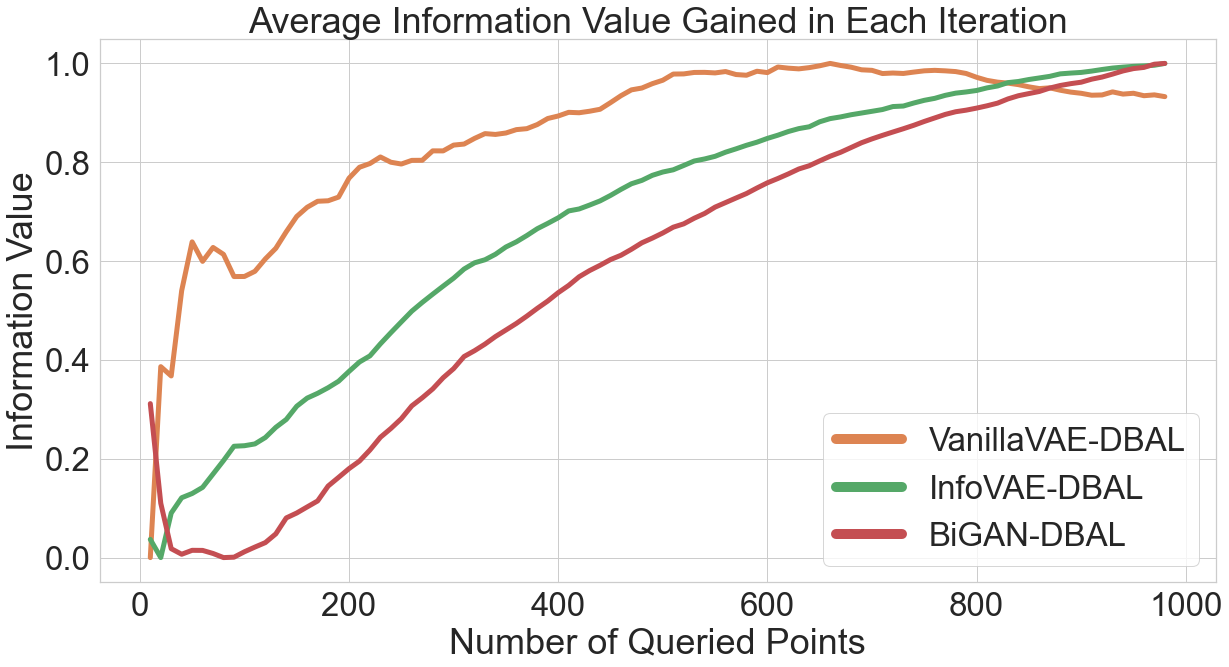

In [7]:

plt.figure(figsize=(20, 10))
plt.title("Average Information Value Gained in Each Iteration")

df_all = df_all.reset_index().drop(columns=['index'])
sns.lineplot(data=df_all, x="Number of Queried Points", y="Information Value", hue="method", legend="full", linewidth=5, palette=sns.color_palette()[1:4])

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)

plt.savefig("average_info_value.pdf")
plt.show()